# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Combining the Datasets

In [2]:
msn10 = pd.read_csv("data/msn_10_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn11 = pd.read_csv("data/msn_11_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn12 = pd.read_csv("data/msn_12_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn14 = pd.read_csv("data/msn_14_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn29 = pd.read_csv("data/msn_29_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn37 = pd.read_csv("data/msn_37_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn53 = pd.read_csv("data/msn_53_fuel_leak_signals_preprocessed.csv", delimiter=';')

In [4]:
combined = pd.concat([msn10, msn11, msn12, msn14, msn29, msn37, msn53])

In [5]:
# Setting index as datetime
combined['UTC_TIME'] = pd.to_datetime(combined['UTC_TIME'])
combined = combined.set_index("UTC_TIME")

combined = combined.sort_index()

In [7]:
# Dropping Duplicates
combined = combined.drop_duplicates()

In [8]:
combined.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21822838 entries, 2014-07-24 07:04:35 to 2018-04-22 16:38:56
Data columns (total 16 columns):
 #   Column              Non-Null Count     Dtype  
---  ------              --------------     -----  
 0   FUEL_USED_2         1027218 non-null   float64
 1   FUEL_USED_3         1027165 non-null   float64
 2   FUEL_USED_4         1027982 non-null   float64
 3   FW_GEO_ALTITUDE     21693656 non-null  float64
 4   VALUE_FOB           21693955 non-null  float64
 5   VALUE_FUEL_QTY_CT   21693955 non-null  float64
 6   VALUE_FUEL_QTY_FT1  21693955 non-null  float64
 7   VALUE_FUEL_QTY_FT2  21693955 non-null  float64
 8   VALUE_FUEL_QTY_FT3  21693955 non-null  float64
 9   VALUE_FUEL_QTY_FT4  21693955 non-null  float64
 10  VALUE_FUEL_QTY_LXT  21693955 non-null  float64
 11  VALUE_FUEL_QTY_RXT  21693955 non-null  float64
 12  FLIGHT_PHASE_COUNT  21694546 non-null  float64
 13  FUEL_USED_1         1032516 non-null   float64
 14  Flight          

In [9]:
combined['FLIGHT_PHASE_COUNT'].value_counts()

FLIGHT_PHASE_COUNT
8.0     17821133
2.0      2202707
11.0     1156562
9.0       252208
7.0       140528
6.0        38734
10.0       23159
3.0        20353
5.0        14551
1.0        14520
4.0         8290
12.0        1790
0.0           11
Name: count, dtype: int64

In [ ]:
# Fill FLIGHT_PHASE_COUNT values by propagating values forward and then backward within each Flight
combined['FLIGHT_PHASE_COUNT'] = combined.groupby('Flight')['FLIGHT_PHASE_COUNT'].ffill().bfill()
# If a NaN appears at the start of a flight, this ensures it gets filled with the next available value

# Different Flights with the Same Flight Number

In [17]:
# Identify when a new flight starts (FLIGHT_PHASE_COUNT resets within each Flight)
combined['NEW_FLIGHT'] = combined.groupby('Flight')['FLIGHT_PHASE_COUNT'].diff().lt(0)

# Assign a unique flight instance number per Flight
combined['FLIGHT_INSTANCE'] = combined.groupby('Flight')['NEW_FLIGHT'].cumsum()

In [19]:
combined

,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,FLIGHT_INSTANCE,NEW_FLIGHT
UTC_TIME,,,,,,,,,,,,,,,,,,
2014-07-24 07:04:35,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.553467,0.0,F-RBAC,0,False
2014-07-24 11:01:53,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.553467,1.0,F-RBAC,0,False
2014-07-24 13:56:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.553467,2.0,F-RBAC,0,False
2014-07-24 15:44:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.553467,3.0,F-RBAC,0,False
2014-07-24 16:19:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.553467,4.0,F-RBAC,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-22 16:38:52,1840.011963,1840.276855,1817.442261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1852.661133,430.0,F-RBAK,11,False
2018-04-22 16:38:53,1840.069824,1840.364502,1817.521973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1852.661133,430.0,F-RBAK,11,False
2018-04-22 16:38:54,1840.069824,1840.408325,1817.623169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1852.661133,430.0,F-RBAK,11,False


In [20]:
# New column to identify unique flights
combined['FLIGHT_ID'] = combined['Flight'].astype(str) + "_" + combined['FLIGHT_INSTANCE'].astype(str)

# Data Preparation

In [22]:
combined.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21822838 entries, 2014-07-24 07:04:35 to 2018-04-22 16:38:56
Data columns (total 19 columns):
 #   Column              Non-Null Count     Dtype  
---  ------              --------------     -----  
 0   FUEL_USED_2         1027218 non-null   float64
 1   FUEL_USED_3         1027165 non-null   float64
 2   FUEL_USED_4         1027982 non-null   float64
 3   FW_GEO_ALTITUDE     21693656 non-null  float64
 4   VALUE_FOB           21693955 non-null  float64
 5   VALUE_FUEL_QTY_CT   21693955 non-null  float64
 6   VALUE_FUEL_QTY_FT1  21693955 non-null  float64
 7   VALUE_FUEL_QTY_FT2  21693955 non-null  float64
 8   VALUE_FUEL_QTY_FT3  21693955 non-null  float64
 9   VALUE_FUEL_QTY_FT4  21693955 non-null  float64
 10  VALUE_FUEL_QTY_LXT  21693955 non-null  float64
 11  VALUE_FUEL_QTY_RXT  21693955 non-null  float64
 12  FLIGHT_PHASE_COUNT  21822838 non-null  float64
 13  FUEL_USED_1         1032516 non-null   float64
 14  Flight          

In [27]:
# Drop null columns
fuel_columns = ["FUEL_USED_1", "FUEL_USED_2", "FUEL_USED_3", "FUEL_USED_4", 
                'VALUE_FUEL_QTY_CT', 
                'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2','VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
                'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT']
combined = combined.dropna(subset=fuel_columns)

In [ ]:
# Filter out only for flight phase 8 - Cruise
combined = combined[combined["FLIGHT_PHASE_COUNT"]==8.0]

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376554 entries, 2015-07-21 03:51:31 to 2018-04-22 11:45:45
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FUEL_USED_2         376554 non-null  float64
 1   FUEL_USED_3         376554 non-null  float64
 2   FUEL_USED_4         376554 non-null  float64
 3   FW_GEO_ALTITUDE     376554 non-null  float64
 4   VALUE_FOB           376554 non-null  float64
 5   VALUE_FUEL_QTY_CT   376554 non-null  float64
 6   VALUE_FUEL_QTY_FT1  376554 non-null  float64
 7   VALUE_FUEL_QTY_FT2  376554 non-null  float64
 8   VALUE_FUEL_QTY_FT3  376554 non-null  float64
 9   VALUE_FUEL_QTY_FT4  376554 non-null  float64
 10  VALUE_FUEL_QTY_LXT  376554 non-null  float64
 11  VALUE_FUEL_QTY_RXT  376554 non-null  float64
 12  FLIGHT_PHASE_COUNT  376554 non-null  float64
 13  FUEL_USED_1         376554 non-null  float64
 14  Flight              376554 non-null  float64
 15  

# Feature Engineering

### Calculating Fuel Discrepancy

In [ ]:
# Sort by time
combined = combined.sort_index()

# Find the initial fuel value for each flight instance
combined['START_FOB'] = combined.groupby('FLIGHT_ID')['VALUE_FOB'].transform('first')

# Calculate the total fuel used
combined['TOTAL_FUEL_USED'] = combined['FUEL_USED_1'] + combined['FUEL_USED_2'] + combined['FUEL_USED_3'] + combined['FUEL_USED_4']

# Calcuate expected fuel on board
combined['EXPECTED_FOB'] = combined['START_FOB'] - combined['TOTAL_FUEL_USED']

# Find Fuel Discrepancy between expected value and current value
combined["FOB_DIFFERENCE"] = (combined['EXPECTED_FOB'] - combined['VALUE_FOB']).abs()

In [30]:
combined.head()

,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,...,FUEL_USED_1,Flight,MSN,FLIGHT_INSTANCE,NEW_FLIGHT,FLIGHT_ID,START_FOB,TOTAL_FUEL_USED,EXPECTED_FOB,FOB_DIFFERENCE
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,1920.0,...,2445.828857,988.0,F-RBAD,0,False,988.0_0,30967.0,9826.431152,21140.568848,9826.431152
2016-08-16 12:29:02,531.809998,528.252380,523.025574,29998.0,19135.0,0.0,1963.0,2624.0,2443.0,1775.0,...,531.520386,5.0,F-RBAJ,13,False,5.0_13,19135.0,2114.608337,17020.391663,2114.608337
2016-08-16 12:29:03,532.141541,528.685181,523.363403,30010.0,19134.0,0.0,1966.0,2624.0,2442.0,1776.0,...,531.903503,5.0,F-RBAJ,13,False,5.0_13,19135.0,2116.093628,17018.906372,2115.093628
2016-08-16 12:29:04,532.568909,529.068176,523.795654,30003.0,19136.0,0.0,1969.0,2624.0,2442.0,1776.0,...,532.335571,5.0,F-RBAJ,13,False,5.0_13,19135.0,2117.768311,17017.231689,2118.768311
2016-08-16 12:29:05,532.947754,529.499207,524.179749,29989.0,19133.0,0.0,1972.0,2624.0,2440.0,1776.0,...,532.669495,5.0,F-RBAJ,13,False,5.0_13,19135.0,2119.296204,17015.703796,2117.296204


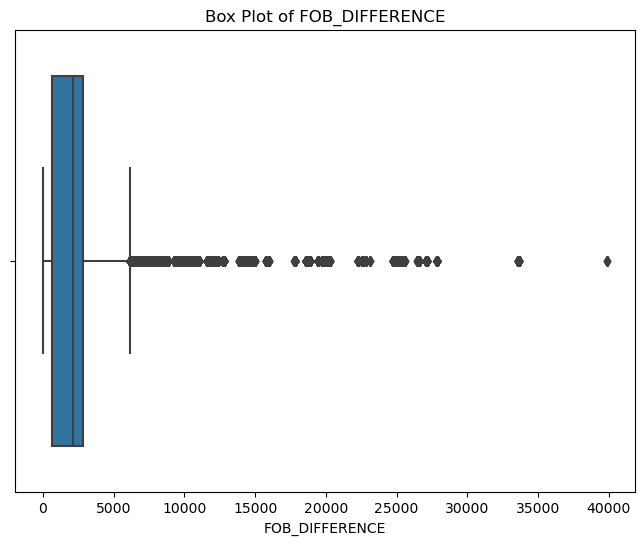

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x=combined['FOB_DIFFERENCE'])
plt.title('Box Plot of FOB_DIFFERENCE')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FOB_DIFFERENCE', ylabel='Count'>

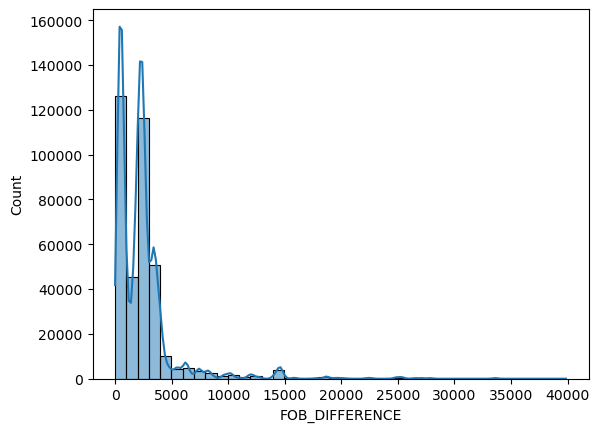

In [32]:
sns.histplot(combined["FOB_DIFFERENCE"], bins=40, kde=True)

In [33]:
combined['FOB_DIFFERENCE'].describe()

count    376554.000000
mean       2439.296653
std        2871.324618
min           0.095032
25%         643.606262
50%        2123.006409
75%        2832.681641
max       39858.523926
Name: FOB_DIFFERENCE, dtype: float64

### Seeing if there is a difference between VALUE_FOB and calculate fuel on board

In [45]:
# Sum up fuel on tanks
combined['CALC_FOB'] = combined['VALUE_FUEL_QTY_CT'] + combined['VALUE_FUEL_QTY_FT1'] + combined['VALUE_FUEL_QTY_FT2'] + combined['VALUE_FUEL_QTY_FT3'] + combined['VALUE_FUEL_QTY_FT4'] + combined['VALUE_FUEL_QTY_LXT'] + combined['VALUE_FUEL_QTY_RXT']

# Find the difference
combined['CALC_VALUE_FOB_DIFF'] =  combined['CALC_FOB'] - combined['VALUE_FOB']

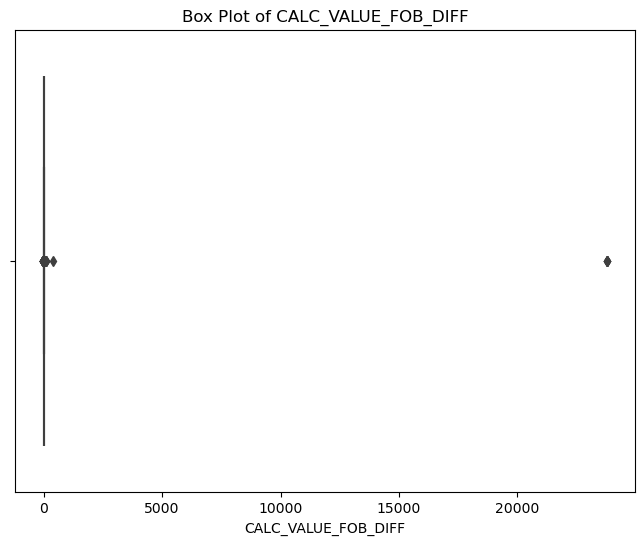

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x=combined['CALC_VALUE_FOB_DIFF'])
plt.title('Box Plot of CALC_VALUE_FOB_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CALC_VALUE_FOB_DIFF', ylabel='Count'>

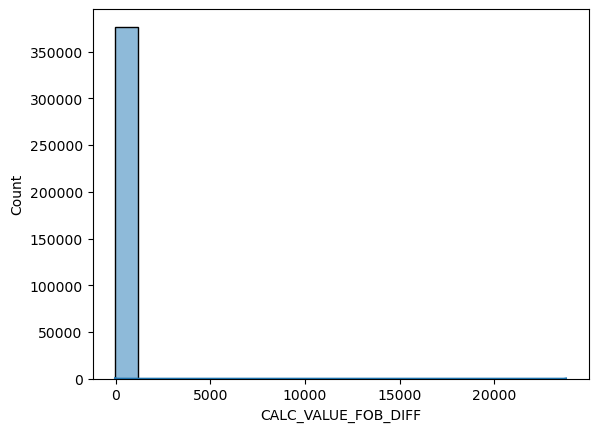

In [48]:
sns.histplot(combined["CALC_VALUE_FOB_DIFF"], bins=20, kde=True)

In [ ]:
combined["CALC_VALUE_FOB_DIFF"].describe()
# Create another columm with threshold

count    376554.000000
mean          2.383310
std          86.638497
min         -30.000000
25%           1.000000
50%           2.000000
75%           3.000000
max       23777.000000
Name: CALC_VALUE_FOB_DIFF, dtype: float64

### Calculating fuel imbalance between left and right wings

In [40]:
# Total Fuel in Left and Right Wing
combined['TOTAL_FUEL_LW'] = (combined['VALUE_FUEL_QTY_LXT'] + combined['VALUE_FUEL_QTY_FT1'] + combined['VALUE_FUEL_QTY_FT2'])
combined['TOTAL_FUEL_RW'] = (combined['VALUE_FUEL_QTY_RXT'] + combined['VALUE_FUEL_QTY_FT3'] + combined['VALUE_FUEL_QTY_FT4'])

# Fuel Difference
combined['LW_RW_DIFF'] = (combined['TOTAL_FUEL_LW'] - combined['TOTAL_FUEL_RW']).abs()

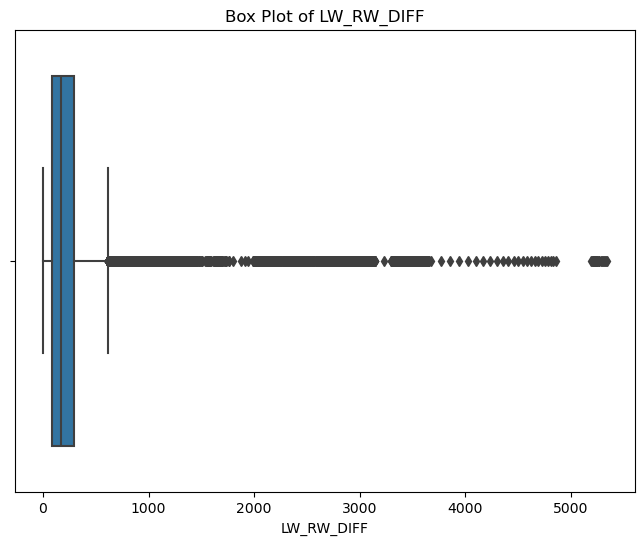

In [41]:
plt.figure(figsize=(8,6))  
sns.boxplot(x=combined['LW_RW_DIFF'])
plt.title('Box Plot of LW_RW_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LW_RW_DIFF', ylabel='Count'>

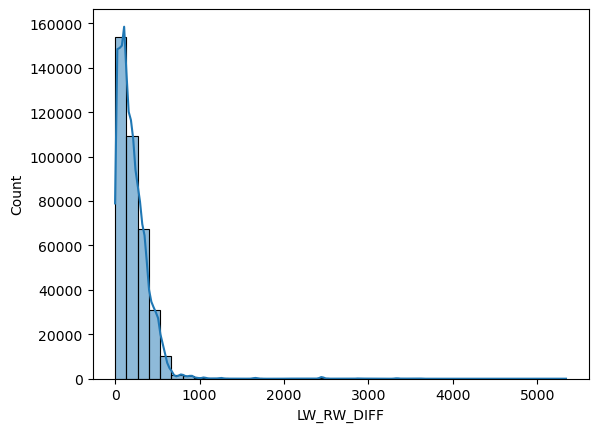

In [39]:
sns.histplot(combined["LW_RW_DIFF"], bins=40, kde=True)

In [50]:
combined["LW_RW_DIFF"].describe()

count    376554.000000
mean        213.144720
std         217.250952
min           0.000000
25%          83.000000
50%         171.000000
75%         297.000000
max        5340.000000
Name: LW_RW_DIFF, dtype: float64

### Difference in Altitude in Cruise Phase 8

In [51]:
combined['ALTITUDE_DIFF'] = combined.groupby('FLIGHT_ID')['FW_GEO_ALTITUDE'].transform('diff')

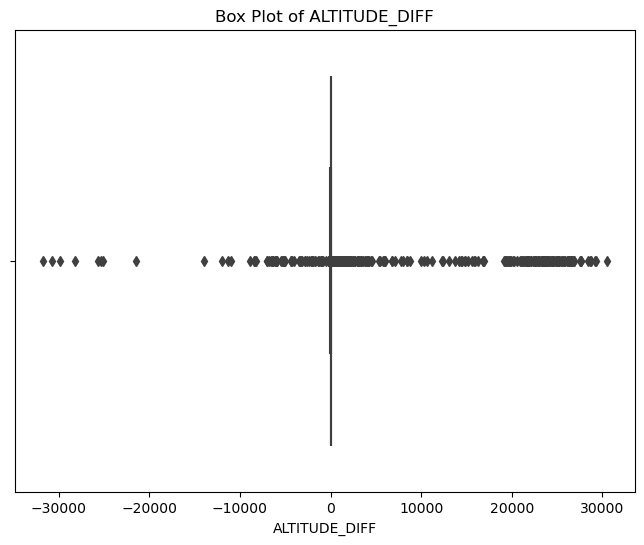

In [52]:
plt.figure(figsize=(8,6))  
sns.boxplot(x=combined['ALTITUDE_DIFF'])
plt.title('Box Plot of ALTITUDE_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ALTITUDE_DIFF', ylabel='Count'>

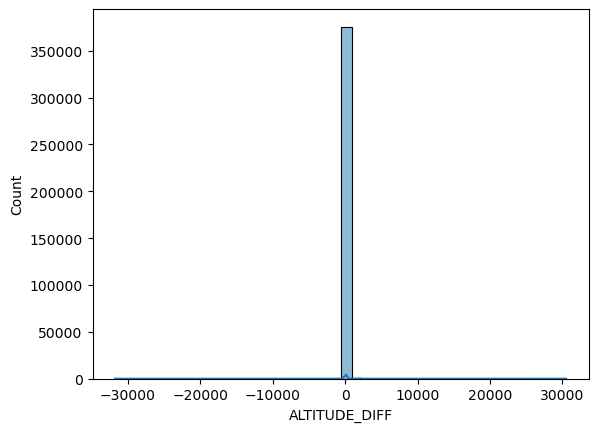

In [53]:
sns.histplot(combined["ALTITUDE_DIFF"], bins=40, kde=True)

# EDA

### Fuel Difference vs Left and Right Wing Difference

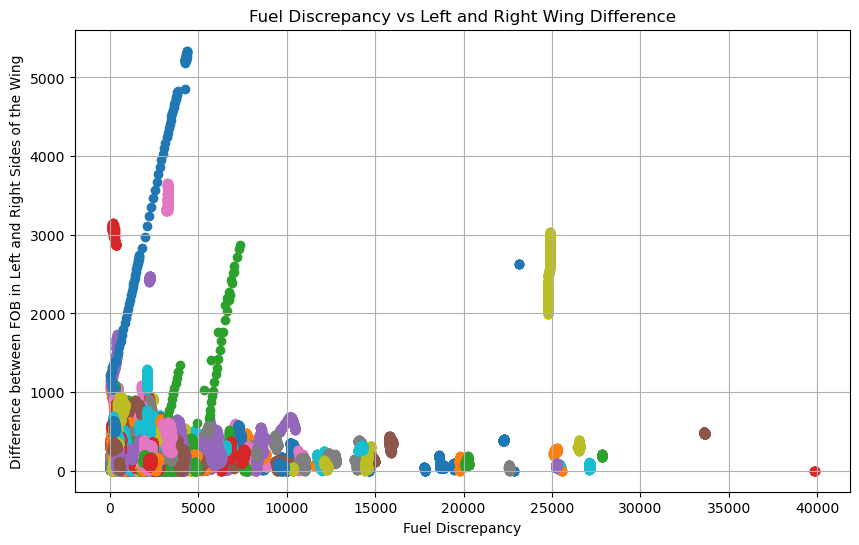

In [55]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
for flight in combined['FLIGHT_ID'].unique():
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['LW_RW_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Left and Right Wing Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Difference between FOB in Left and Right Sides of the Wing")

# Show the plot
plt.grid(True)
plt.show()


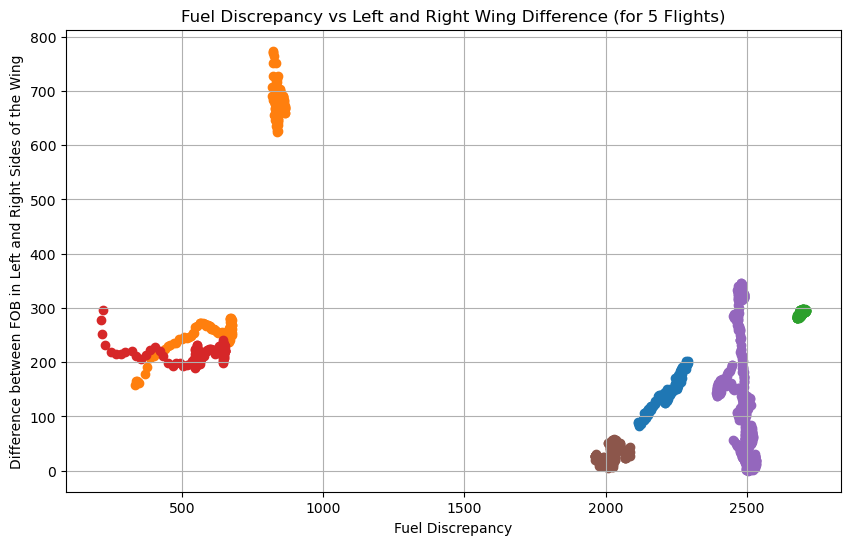

In [56]:
import matplotlib.pyplot as plt

flights_to_plot = combined['FLIGHT_ID'].unique()[:7]

# Create a scatter plot
plt.figure(figsize=(10, 6))
for flight in flights_to_plot[1:]:
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['LW_RW_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Left and Right Wing Difference (for 5 Flights)")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Difference between FOB in Left and Right Sides of the Wing")

# Show the plot
plt.grid(True)
plt.show()

### Fuel Difference vs Altitude Difference

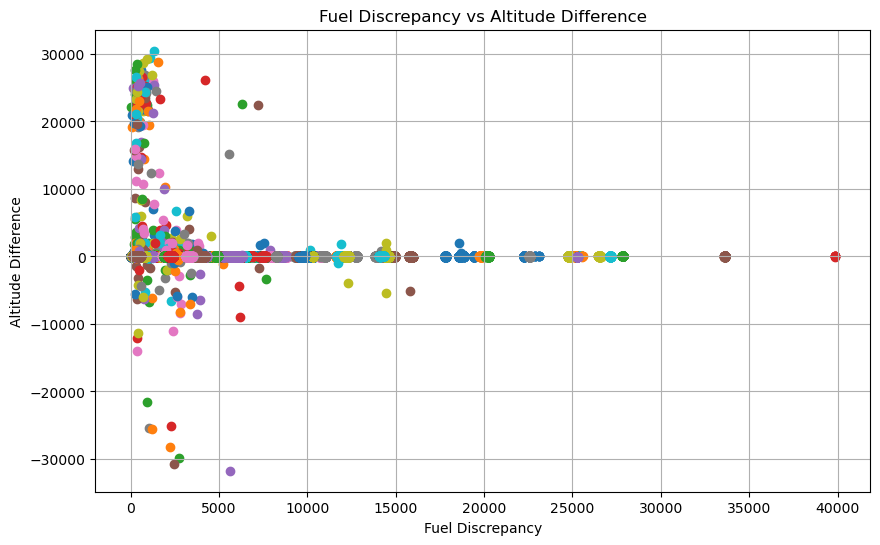

In [57]:
# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in combined['FLIGHT_ID'].unique():
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['ALTITUDE_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Altitude Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Altitude Difference")

# Show the plot with a grid
plt.grid(True)
plt.show()


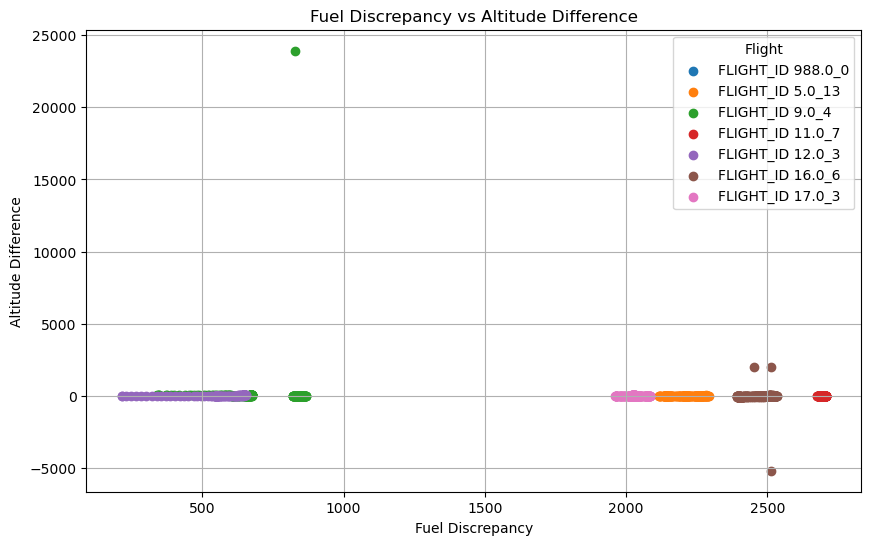

In [58]:
# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in flights_to_plot:
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['ALTITUDE_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Altitude Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Altitude Difference")

# Add a legend for flight differentiation
plt.legend(title="Flight")

# Show the plot with a grid
plt.grid(True)
plt.show()

### Left Wing Right Wing Diffrence vs Altitude Difference

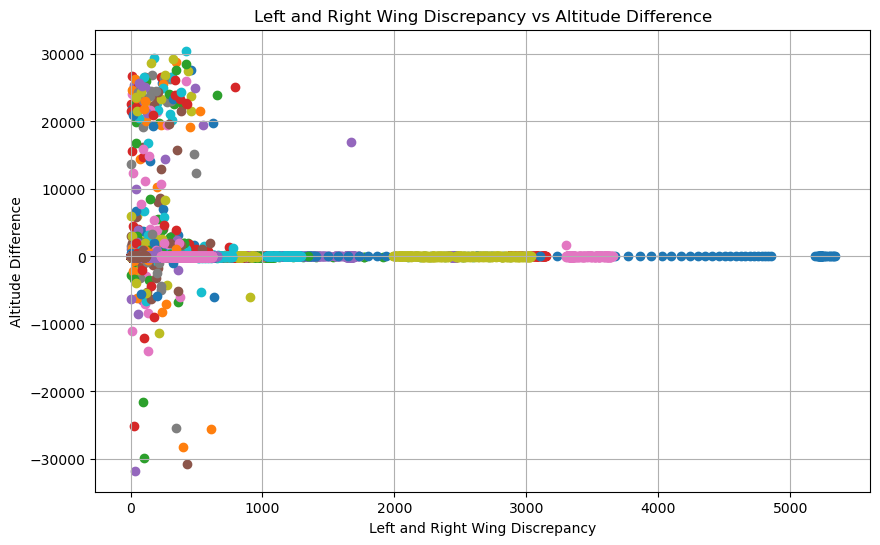

In [60]:
import matplotlib.pyplot as plt

# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in combined['FLIGHT_ID'].unique():
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['LW_RW_DIFF'], flight_data['ALTITUDE_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Left and Right Wing Discrepancy vs Altitude Difference")
plt.xlabel("Left and Right Wing Discrepancy")
plt.ylabel("Altitude Difference")

# Show the plot with a grid
plt.grid(True)
plt.show()

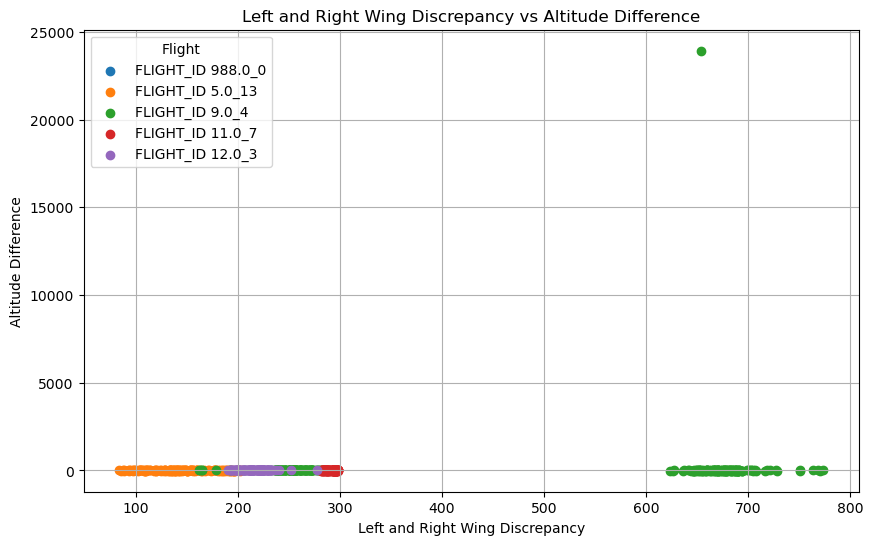

In [61]:
# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Limit the loop to only the first 5 flights
for flight in combined['FLIGHT_ID'].unique()[:5]:  # Limit to the first 5 flights
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['LW_RW_DIFF'], flight_data['ALTITUDE_DIFF'], label=f'FLIGHT_ID {flight}')

# Set the title and axis labels
plt.title("Left and Right Wing Discrepancy vs Altitude Difference")
plt.xlabel("Left and Right Wing Discrepancy")
plt.ylabel("Altitude Difference")

# Add a legend for flight differentiation
plt.legend(title="Flight")

# Show the plot with a grid
plt.grid(True)
plt.show()


### Value FOB vs EXPECTED FOB

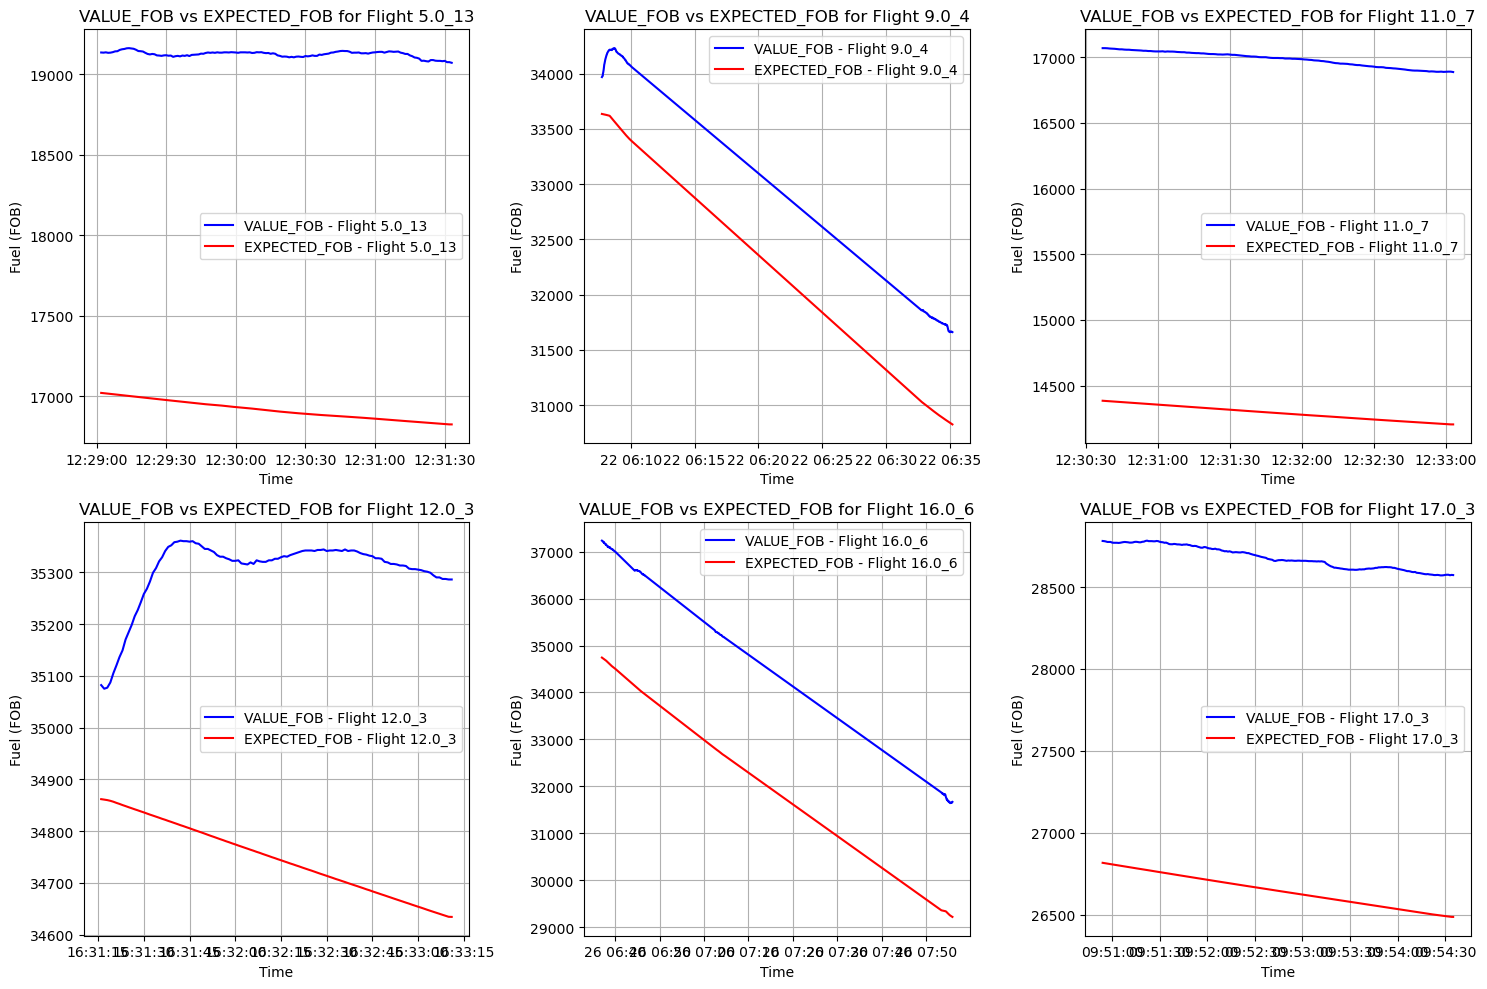

In [63]:
# Get unique flights (limit to 5 flights for better visualization)
unique_flights = combined['FLIGHT_ID'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2  # you can change this based on the number of flights
cols = 3  # you can change this based on the number of flights

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(unique_flights[1:]):  # skipping the first flight
    # Filter data for that flight
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the actual fuel on board (VALUE_FOB) vs expected fuel on board (EXPECTED_FOB)
    ax.plot(flight_data.index, flight_data['VALUE_FOB'], label=f'VALUE_FOB - Flight {flight}', color='blue')
    ax.plot(flight_data.index, flight_data['EXPECTED_FOB'], label=f'EXPECTED_FOB - Flight {flight}', color='red')
    
    # Set the title and labels for the subplot
    ax.set_title(f'VALUE_FOB vs EXPECTED_FOB for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Comparing Starting FOB with TOTAL_FUEL_USED and the remaining fuel on board (VALUE_FOB)
By comparing `START_FOB` (the fuel initially onboard) with `TOTAL_FUEL_USED` + `VALUE_FOB` (the amount of fuel that should be left onboard after accounting for fuel use), you can identify significant differences. If the fuel used plus the expected fuel on board is consistently higher than the starting fuel, this may indicate a fuel leak.

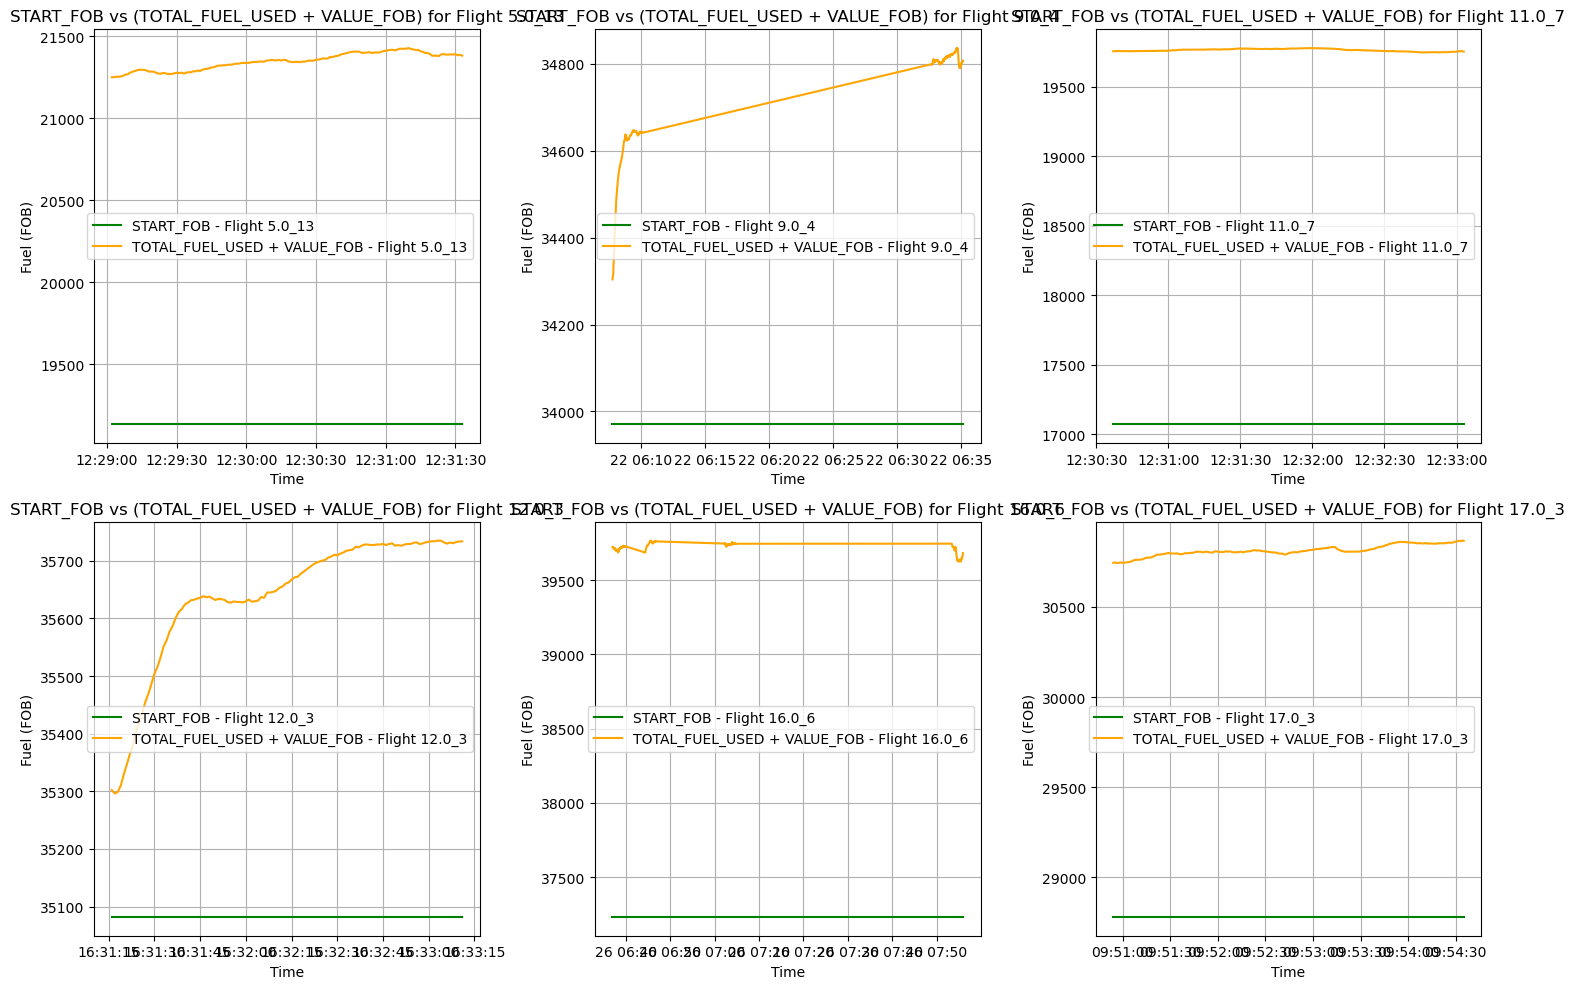

In [64]:
# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2 
cols = 3  

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(unique_flights[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the START_FOB
    ax.plot(flight_data.index, flight_data['START_FOB'], label=f'START_FOB - Flight {flight}', color='green')
    
    # Calculate TOTAL_FUEL_USED + VALUE_FOB for the entire flight
    total_fuel_used_plus_fob = flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']
    
    # Plot the TOTAL_FUEL_USED + VALUE_FOB
    ax.plot(flight_data.index, total_fuel_used_plus_fob, label=f'TOTAL_FUEL_USED + VALUE_FOB - Flight {flight}', color='orange')
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Left and Right Wing Differences vs Altitude
- **Asymmetry in Fuel Consumption:** A significant and consistent difference between the left and right wings' fuel levels could indicate a fuel leak in one of the wings. Normally, fuel usage should be fairly balanced across both wings, so irregularities may suggest a problem.

- **Altitude Impact:** If the fuel difference becomes more pronounced at certain altitudes, it might signal that a fuel leak or imbalance in fuel transfer is worsening under specific flight conditions, such as changes in air pressure or flight dynamics at higher altitudes.

- **Early Detection:** By monitoring this difference in real-time, you can identify potential fuel leaks early in the flight, allowing corrective action to be taken before it becomes a safety issue.

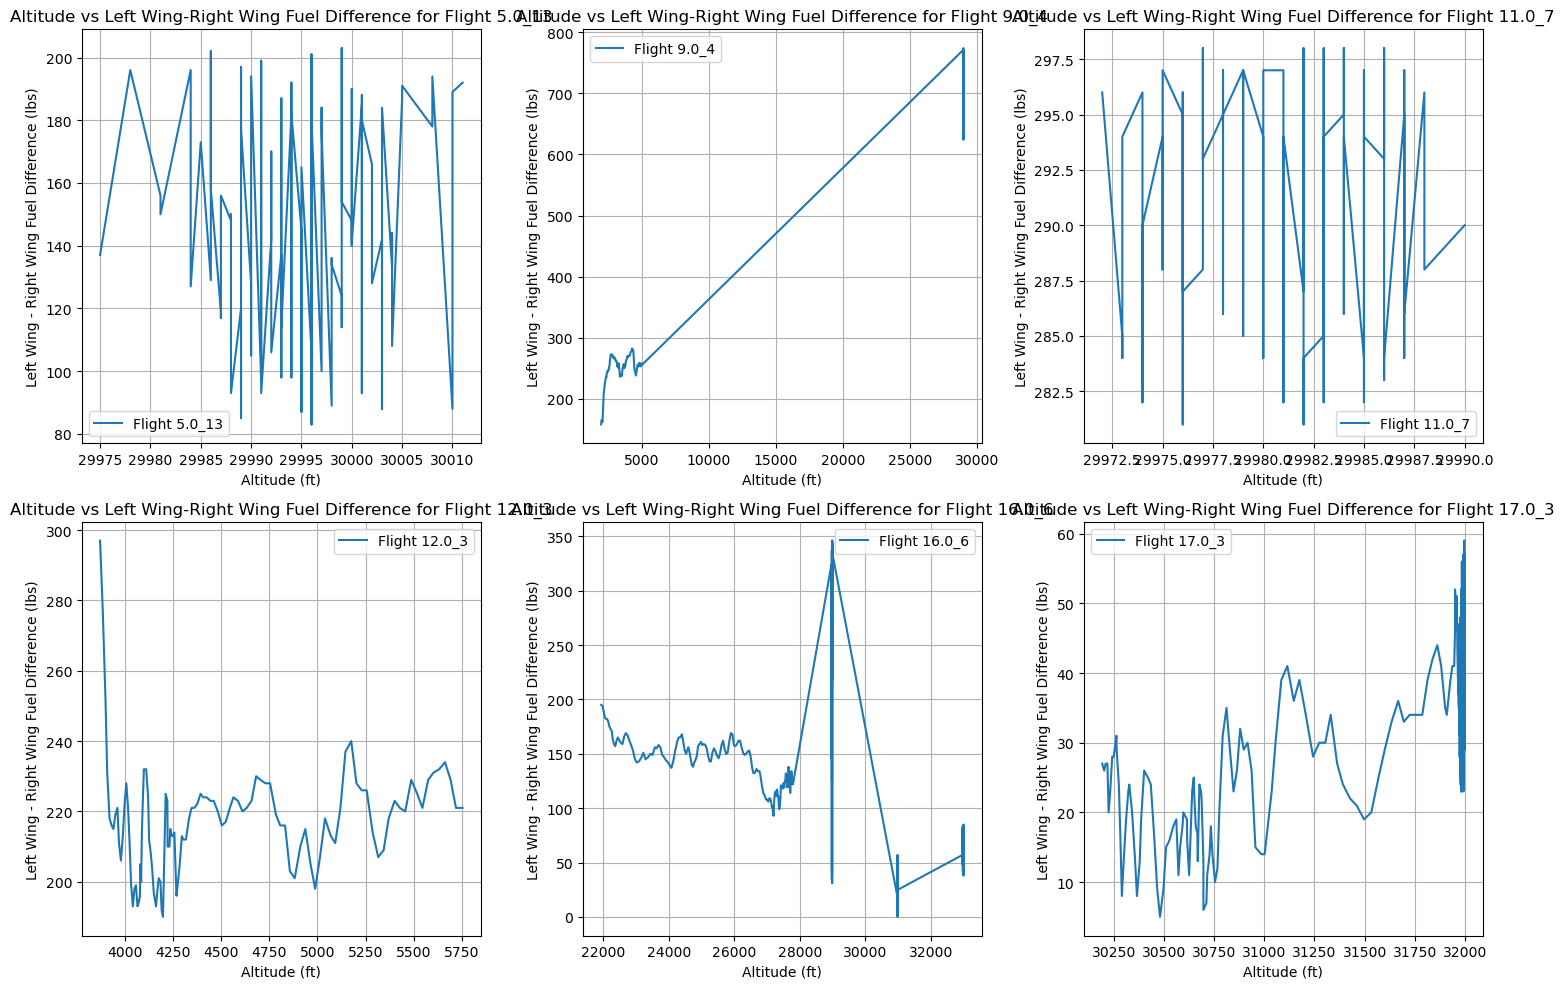

In [65]:
# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
counter = 0
for idx, flight in enumerate(unique_flights[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Sort the data by 'FW_GEO_ALTITUDE' for a meaningful line graph
    flight_data = flight_data.sort_values(by='FW_GEO_ALTITUDE')
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Line plot of Altitude vs Left Wing-Right Wing fuel difference
    ax.plot(flight_data['FW_GEO_ALTITUDE'], flight_data['LW_RW_DIFF'], label=f'Flight {flight}')
    
    # Set the title and labels for the subplot
    ax.set_title(f'Altitude vs Left Wing-Right Wing Fuel Difference for Flight {flight}')
    ax.set_xlabel('Altitude (ft)')
    ax.set_ylabel('Left Wing - Right Wing Fuel Difference (lbs)')
    
    # Add a legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### FOB_DIFFERENCE With altitude

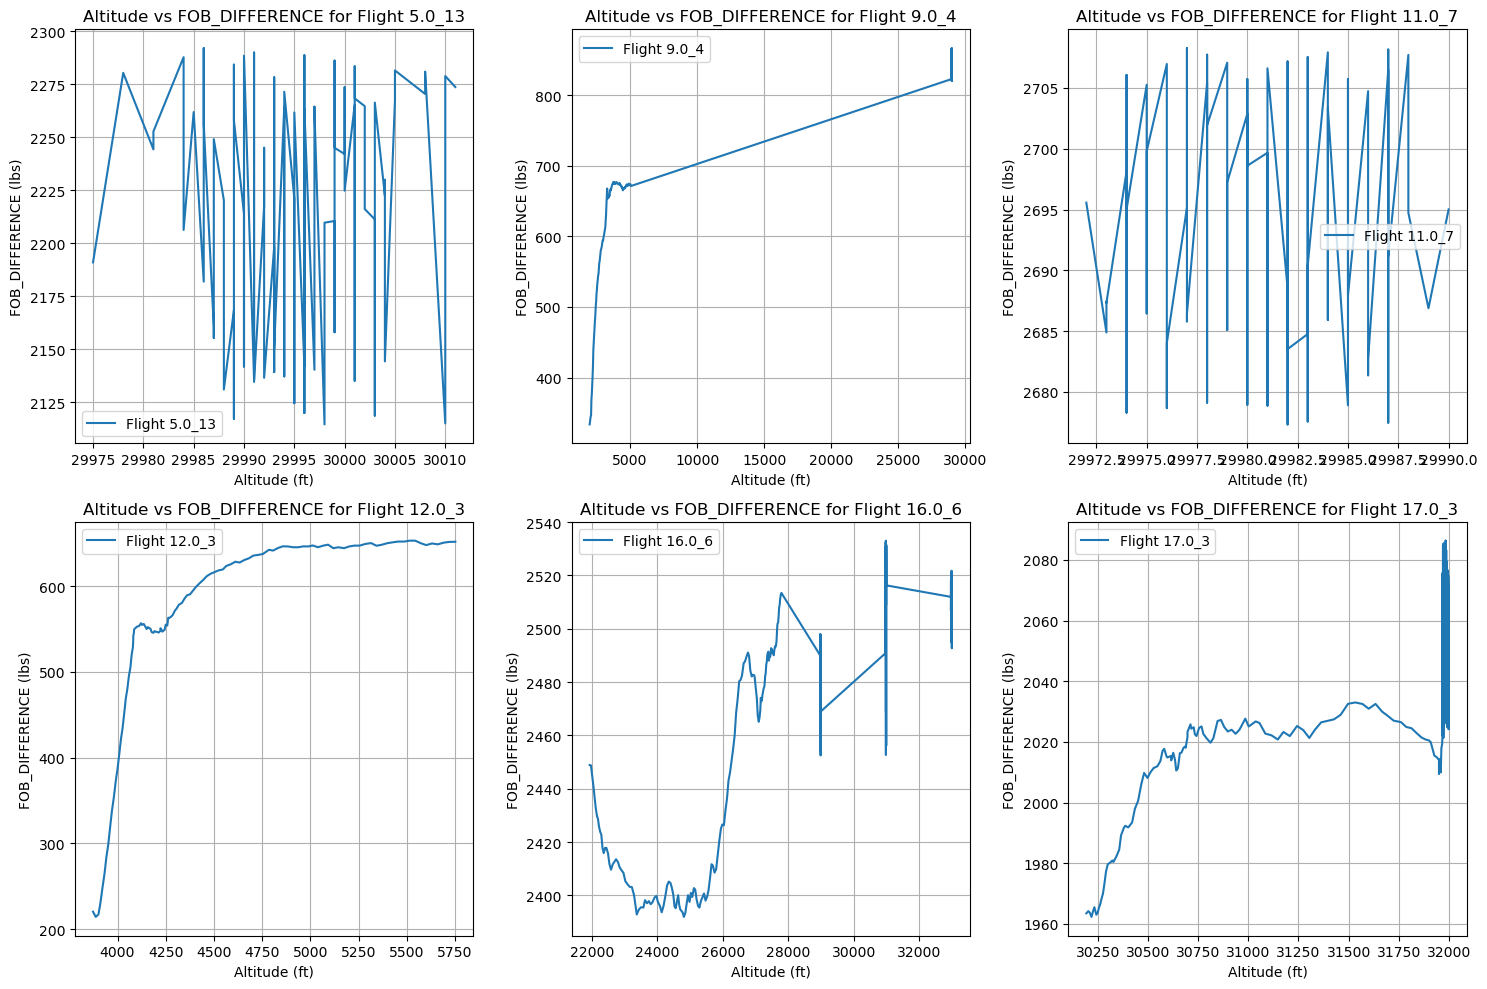

In [66]:
# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
counter = 0
for idx, flight in enumerate(unique_flights[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Sort the data by 'FW_GEO_ALTITUDE' for a meaningful line graph
    flight_data = flight_data.sort_values(by='FW_GEO_ALTITUDE')
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Line plot of Altitude vs FOB_DIFFERENCE
    ax.plot(flight_data['FW_GEO_ALTITUDE'], flight_data['FOB_DIFFERENCE'], label=f'Flight {flight}')
    
    # Set the title and labels for the subplot
    ax.set_title(f'Altitude vs FOB_DIFFERENCE for Flight {flight}')
    ax.set_xlabel('Altitude (ft)')
    ax.set_ylabel('FOB_DIFFERENCE (lbs)')
    
    # Add a legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


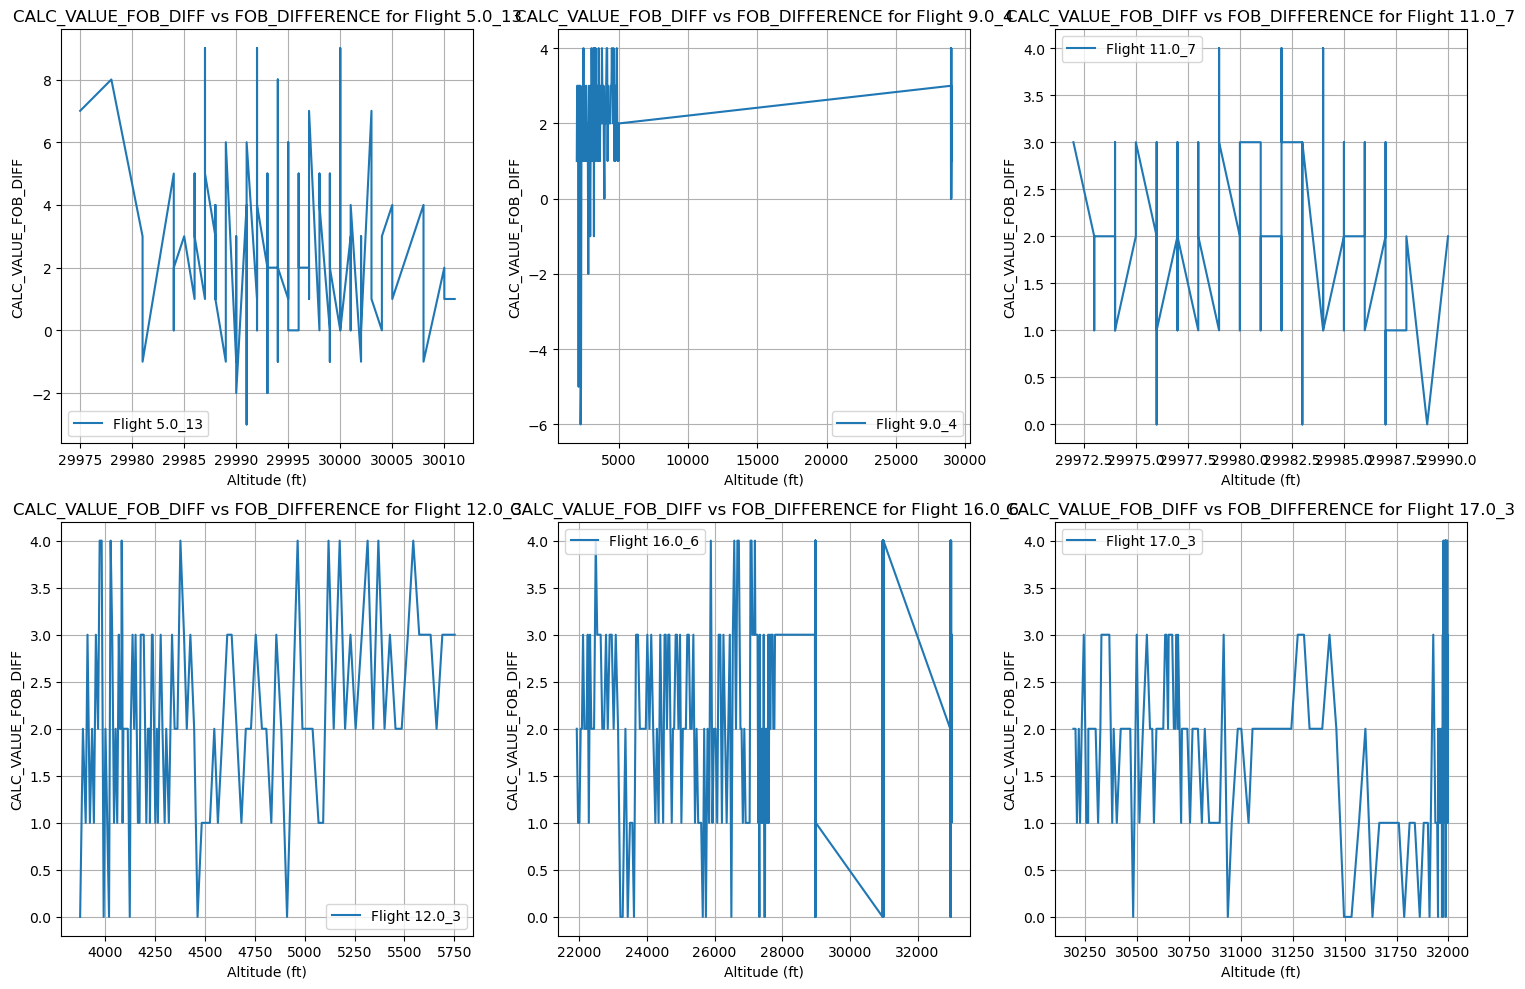

In [67]:
# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
counter = 0
for idx, flight in enumerate(unique_flights[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = combined[combined['FLIGHT_ID'] == flight]
    
    # Sort the data by 'FW_GEO_ALTITUDE' for a meaningful line graph
    flight_data = flight_data.sort_values(by='FW_GEO_ALTITUDE')
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Line plot of Altitude vs FOB_DIFFERENCE
    ax.plot(flight_data['FW_GEO_ALTITUDE'], flight_data['CALC_VALUE_FOB_DIFF'], label=f'Flight {flight}')
    
    # Set the title and labels for the subplot
    ax.set_title(f'CALC_VALUE_FOB_DIFF vs FOB_DIFFERENCE for Flight {flight}')
    ax.set_xlabel('Altitude (ft)')
    ax.set_ylabel('CALC_VALUE_FOB_DIFF')
    
    # Add a legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
